In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm # progress bar
tqdm.pandas()

sys.path.append('./MolecularClustering')
from molecules_clustering import Butina_clustering
from diversesubset import distance_maxtrix, diverse_subset
from cluster_visualize import cluster_heat_map, cluster_scatter_plot


sys.path.append('./ultility')
from standardize import standardization

reading NP model ...
model in


In [2]:
#load data
df = pd.read_csv("Apelin.csv", index_col=None)
df.head(2)
df.shape

(2328, 3)

# 1. Standardize

In [3]:
from rdkit.rdBase import BlockLogs
block = BlockLogs()
std = standardization(data=df,ID='ID', smiles_col='Canomial_smiles', active_col='Activity', ro5 =3)
data = std.filter_data()
data.head(2)

  0%|          | 0/2328 [00:00<?, ?it/s]

  0%|          | 0/1997 [00:00<?, ?it/s]

C:\Users\DELL\OneDrive - UMP\kse\CLUSTERING\./ultility\standardize.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Molecule'] = self.data['Canomicalsmiles'].progress_apply(self.standardize)


,Canomial_smiles,ID,Activity,Canomicalsmiles,Molecule
0,CCCCC(CC(=O)O)NC(=O)c1ccc2c(c1)nc(Cc1cccs1)n2C...,Reaxys_26688897,6.26,CCCCC(CC(=O)O)NC(=O)c1ccc2c(c1)nc(Cc1cccs1)n2C...,<rdkit.Chem.rdchem.Mol object at 0x000001A72F3...
1,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)NC(CC(=O)O)CC3C...,Reaxys_26688898,6.95,CCC(CC)n1c(Cc2cccs2)nc2cc(C(=O)NC(CC(=O)O)CC3C...,<rdkit.Chem.rdchem.Mol object at 0x000001A72F3...


# 2. Butina Clustering

# Total compound

In [4]:
butina = Butina_clustering(df = data, ID = "ID", smiles_col = "StandSmiles", active_col = 'Activity', 
                             mol_col = 'Molecule', activity_thresh = 7, radius= 2, nBits = 2048, 
                             dis_cutoff = 0.65, cps = 0)
active_set, cluster_centers,  df_active = butina.data_processing()

total # clusters:  23
# clusters with >5 compounds:  15
# clusters with >25 compounds:  8
# clusters with >50 compounds:  5
# clusters with >75 compounds:  4
cluster_centers 23
Silhouette Score: 0.13530396245963291


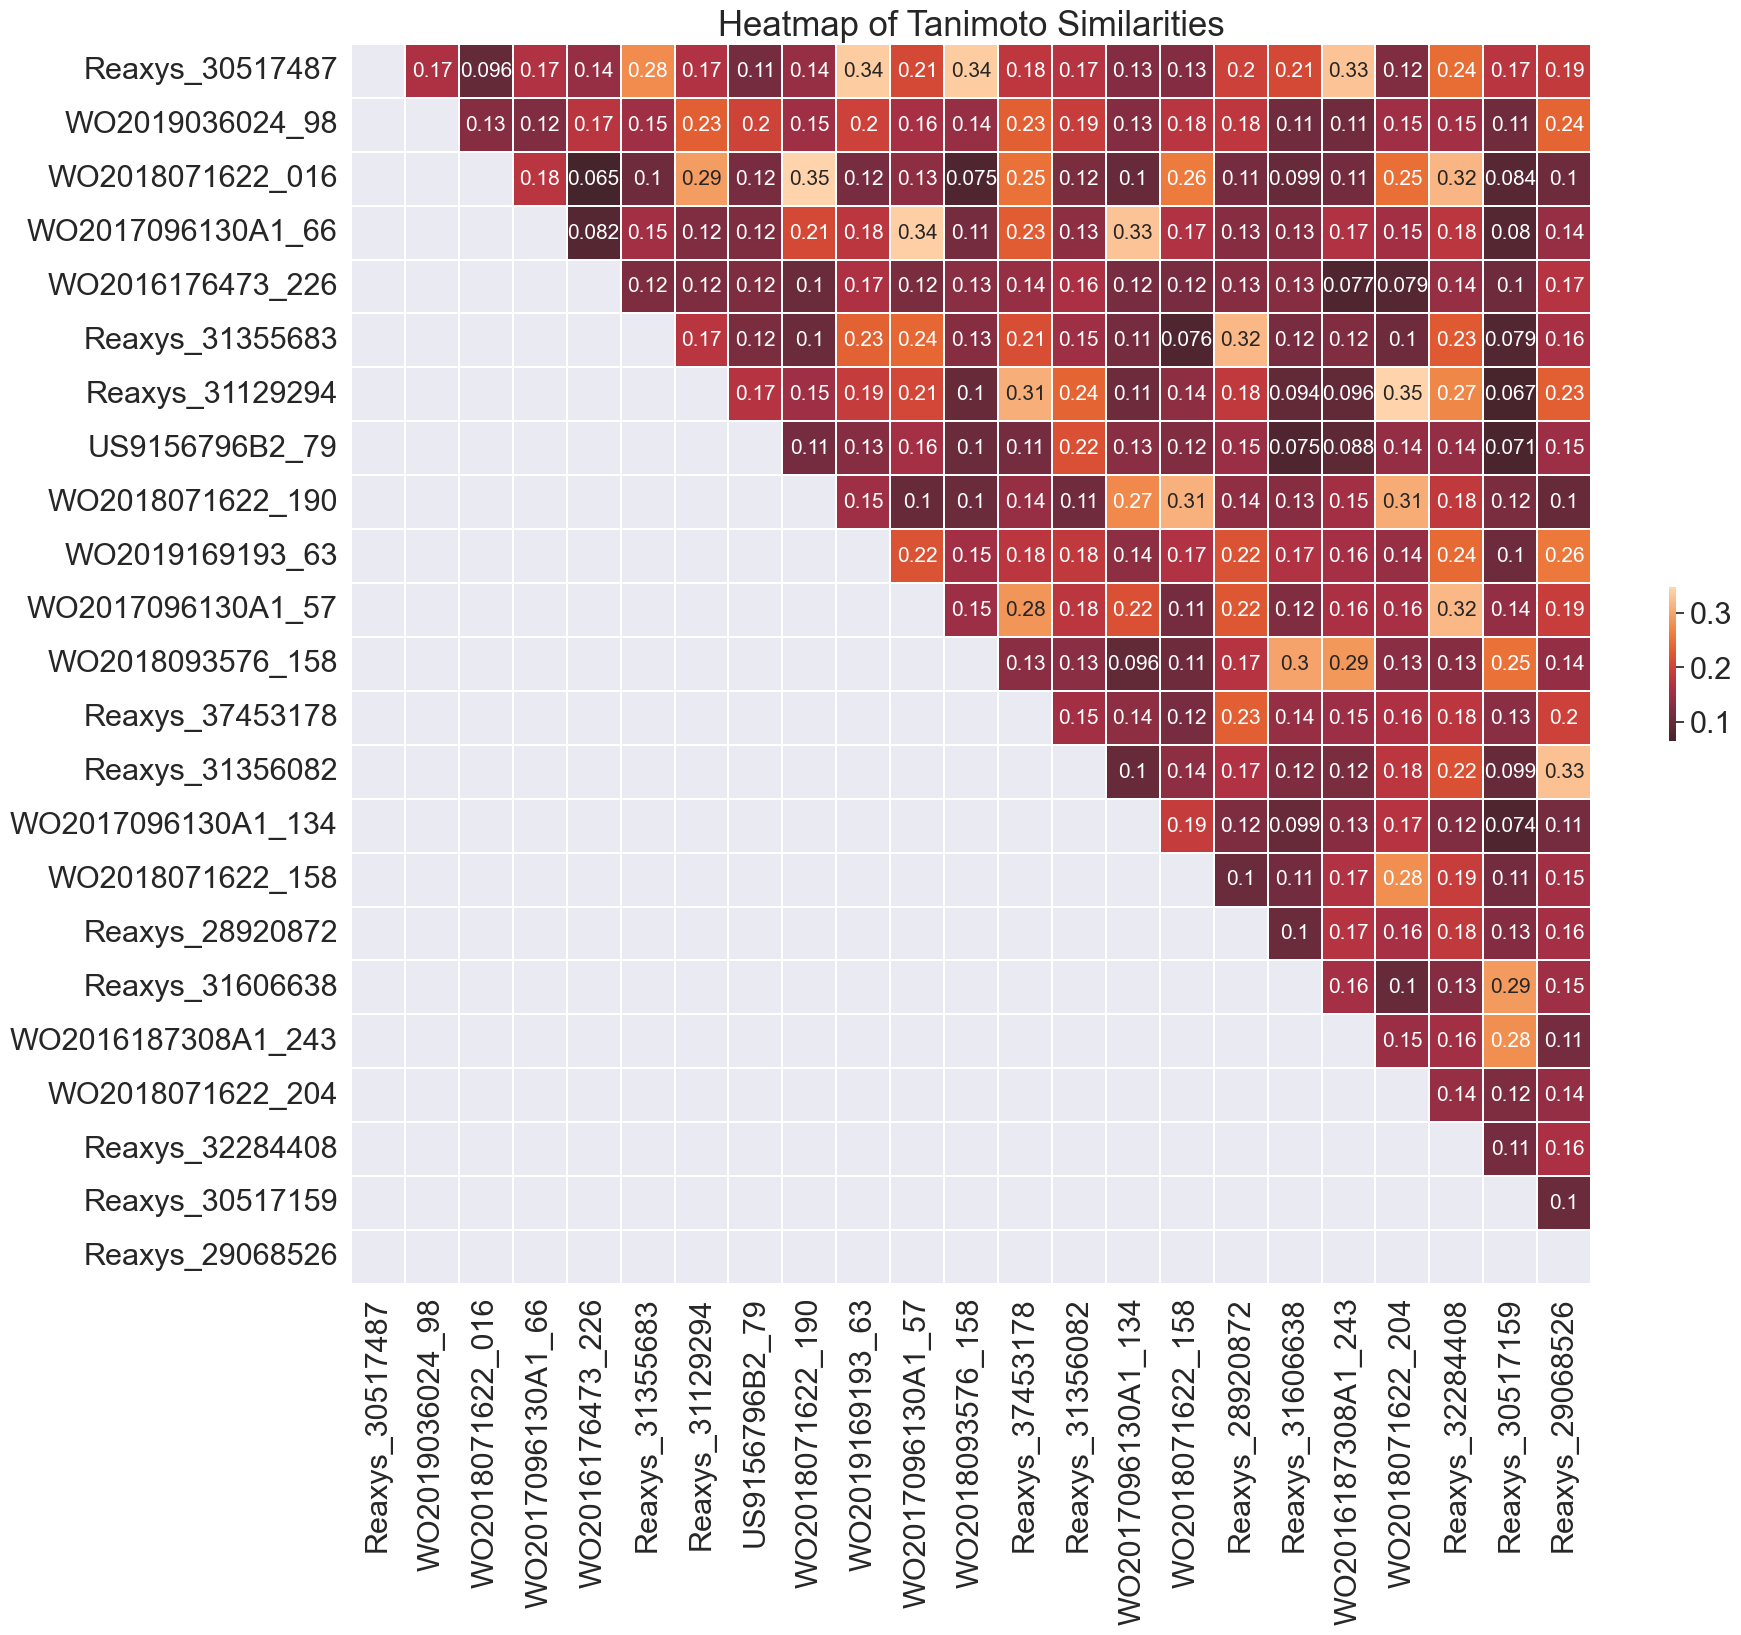

In [5]:
plot0 = cluster_heat_map(cls_cps = cluster_centers, radius = 2, nBits = 2048)
plot0.visualize_triangle()
plt.savefig('./HeatmapSimilarities.png', dpi = 300)

C:\Users\DELL\OneDrive - UMP\kse\CLUSTERING\./MolecularClustering\cluster_visualize.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_cls.drop(idx, axis = 0, inplace = True)
C:\Users\DELL\OneDrive - UMP\kse\CLUSTERING\./MolecularClustering\cluster_visualize.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_cls["FPs"] = self.df_cls[self.mol_col].apply(self.mol2ecfp)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.

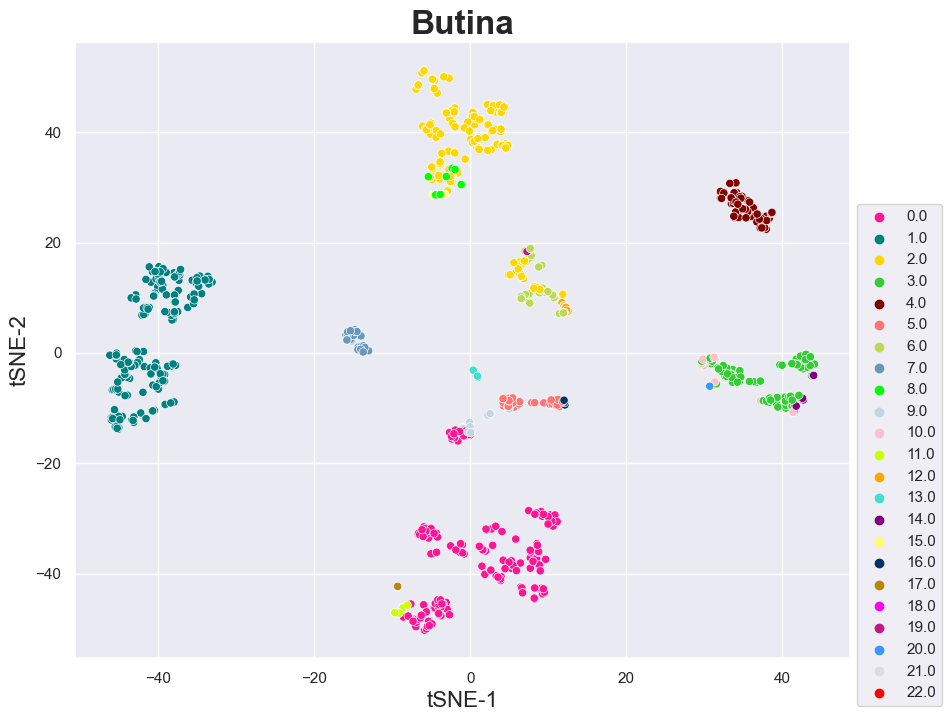

In [83]:
color = ['#ff1493','#008080','#ffd700','#32CD32','#800000','#ff7373','#bada55','#6897bb','#00ff00','#c0d6e4','#ffc0cb','#ccff00',
        '#ffa500','#40e0d0','#800080','#ffff66','#003366','#B8860B','#ff00ff','#C71585','#3399ff','#dddddd','#ff0000']
plot = cluster_scatter_plot(data=df_active, no_cls= 23, mol_col='Molecule', algo = 'Butina',cluster_col='Cluster',
                             palette=sns.color_palette(color))
plot.visualize()
#plt.savefig('./ScatterplotButina_cps=1.png', dpi = 300)

# At least 5 compound  / Cps=5

In [84]:
butina1 = Butina_clustering(df = data, ID = "ID", smiles_col = "StandSmiles", active_col = 'Activity', 
                             mol_col = 'Molecule', activity_thresh = 7, radius= 2, nBits = 2048, 
                             dis_cutoff = 0.65, cps = 5)
active_set1, cluster_centers1,  df_active1 = butina1.data_processing()

total # clusters:  23
# clusters with >5 compounds:  15
# clusters with >25 compounds:  8
# clusters with >50 compounds:  5
# clusters with >75 compounds:  4
cluster_centers 15
Silhouette Score: 0.13530396245963291


C:\Users\DELL\OneDrive - UMP\kse\CLUSTERING\./MolecularClustering\cluster_visualize.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_cls.drop(idx, axis = 0, inplace = True)
C:\Users\DELL\OneDrive - UMP\kse\CLUSTERING\./MolecularClustering\cluster_visualize.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_cls["FPs"] = self.df_cls[self.mol_col].apply(self.mol2ecfp)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.

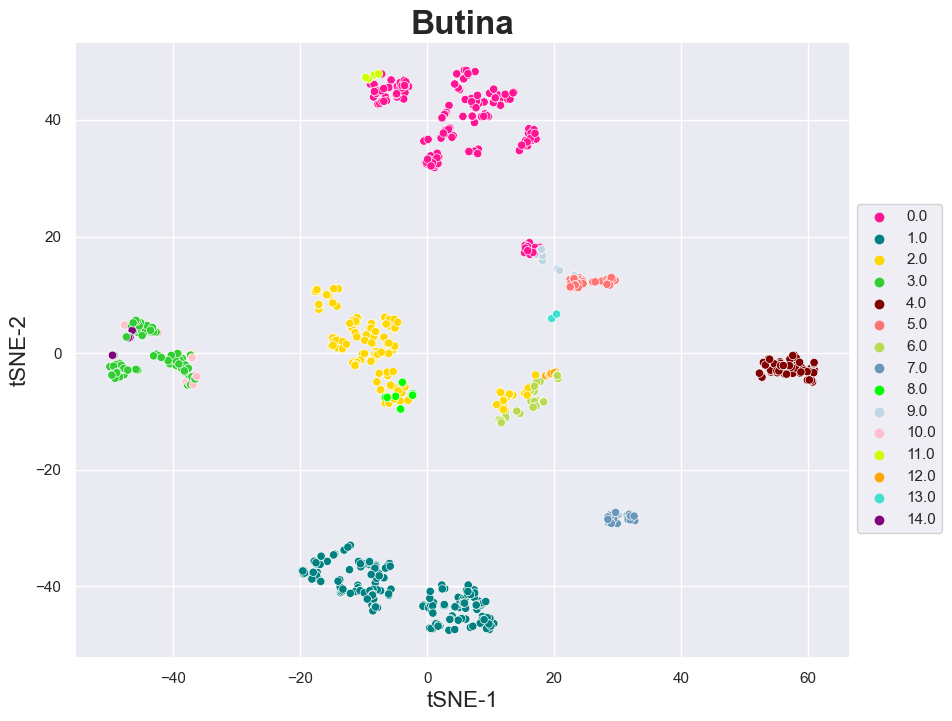

In [85]:
color1 = ['#ff1493','#008080','#ffd700','#32CD32','#800000','#ff7373','#bada55','#6897bb','#00ff00','#c0d6e4','#ffc0cb','#ccff00',
        '#ffa500','#40e0d0','#800080']
plot1 = cluster_scatter_plot(data= df_active1, no_cls= 14, mol_col='Molecule', algo = 'Butina',cluster_col='Cluster',
                             palette=sns.color_palette(color1))
plot1.visualize()
#plt.savefig('./ScatterplotButina_cps=1.png', dpi = 300)

 # At least 25 compound  / Cps=25

In [86]:
butina2 = Butina_clustering(df = data, ID = "ID", smiles_col = "StandSmiles", active_col = 'Activity', 
                             mol_col = 'Molecule', activity_thresh = 7, radius= 2, nBits = 2048, 
                             dis_cutoff = 0.65, cps = 25)
active_set2, cluster_centers2,  df_active2 = butina2.data_processing()

total # clusters:  23
# clusters with >5 compounds:  15
# clusters with >25 compounds:  8
# clusters with >50 compounds:  5
# clusters with >75 compounds:  4
cluster_centers 8
Silhouette Score: 0.13530396245963291


C:\Users\DELL\OneDrive - UMP\kse\CLUSTERING\./MolecularClustering\cluster_visualize.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_cls.drop(idx, axis = 0, inplace = True)
C:\Users\DELL\OneDrive - UMP\kse\CLUSTERING\./MolecularClustering\cluster_visualize.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_cls["FPs"] = self.df_cls[self.mol_col].apply(self.mol2ecfp)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.

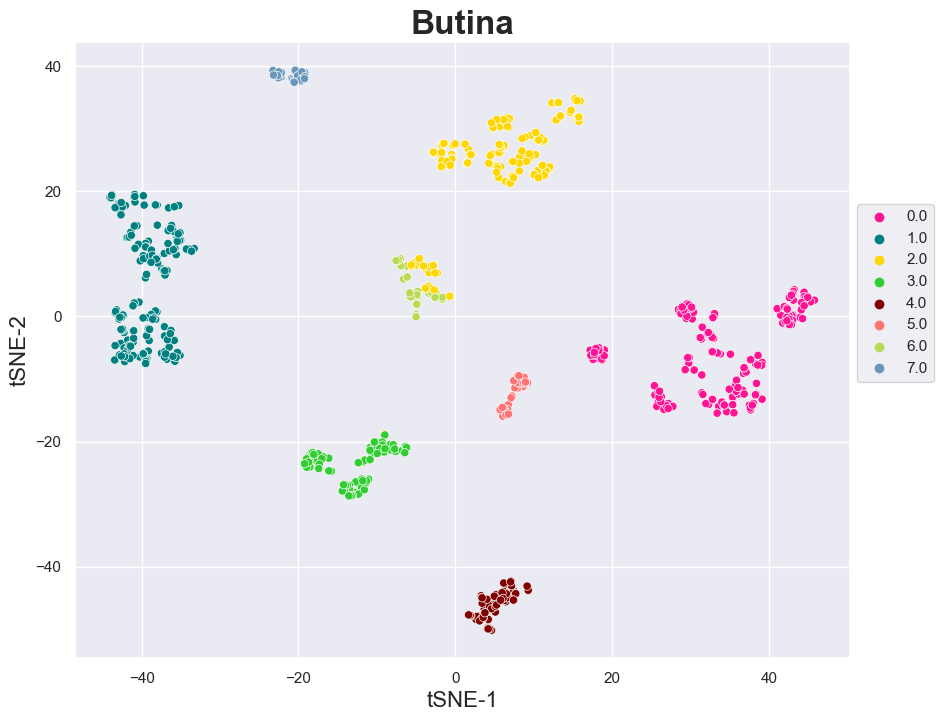

In [87]:
color2 = ['#ff1493','#008080','#ffd700','#32CD32','#800000','#ff7373','#bada55','#6897bb']
plot2 = cluster_scatter_plot(data= df_active1, no_cls= 7, mol_col='Molecule', algo = 'Butina',cluster_col='Cluster',
                             palette=sns.color_palette(color2))
plot2.visualize()
#plt.savefig('./ScatterplotButina_cps=1.png', dpi = 300)

# At least 50 compound  / Cps=50

In [88]:
butina3 = Butina_clustering(df = data, ID = "ID", smiles_col = "StandSmiles", active_col = 'Activity', 
                             mol_col = 'Molecule', activity_thresh = 7, radius= 2, nBits = 2048, 
                             dis_cutoff = 0.65, cps = 50)
active_set3, cluster_centers3,  df_active3 = butina3.data_processing()

total # clusters:  23
# clusters with >5 compounds:  15
# clusters with >25 compounds:  8
# clusters with >50 compounds:  5
# clusters with >75 compounds:  4
cluster_centers 5
Silhouette Score: 0.13530396245963291


C:\Users\DELL\OneDrive - UMP\kse\CLUSTERING\./MolecularClustering\cluster_visualize.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_cls.drop(idx, axis = 0, inplace = True)
C:\Users\DELL\OneDrive - UMP\kse\CLUSTERING\./MolecularClustering\cluster_visualize.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_cls["FPs"] = self.df_cls[self.mol_col].apply(self.mol2ecfp)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.

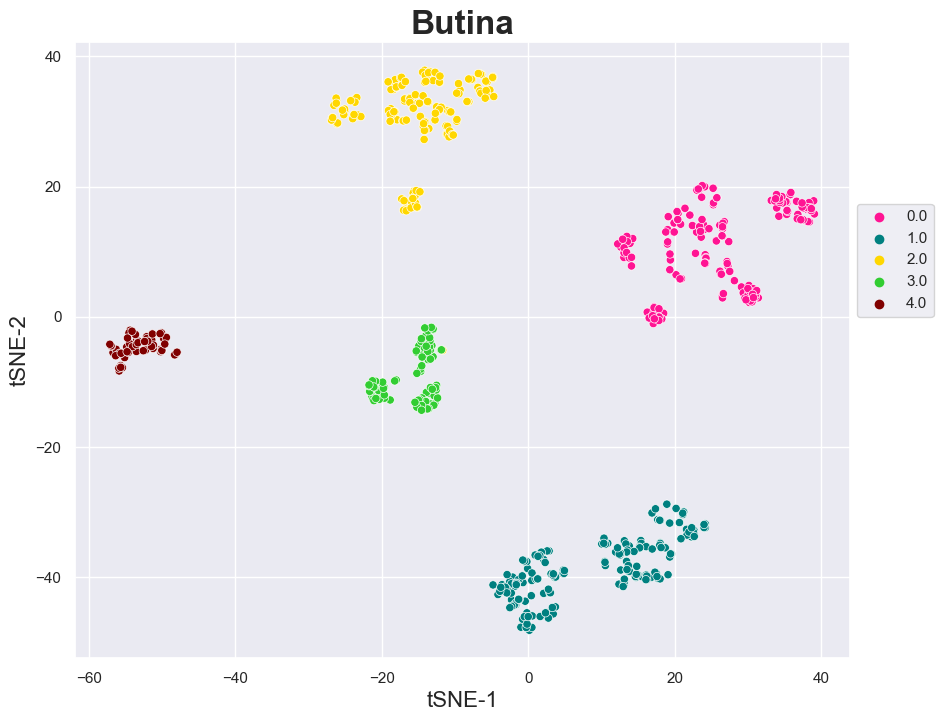

In [90]:
color3 = ['#ff1493','#008080','#ffd700','#32CD32','#800000']
plot3 = cluster_scatter_plot(data= df_active1, no_cls= 4, mol_col='Molecule', algo = 'Butina',cluster_col='Cluster',
                             palette=sns.color_palette(color3))
plot3.visualize()
#plt.savefig('./ScatterplotButina_cps=1.png', dpi = 300)

# At least 75 compound  / Cps=75

In [91]:
butina4 = Butina_clustering(df = data, ID = "ID", smiles_col = "StandSmiles", active_col = 'Activity', 
                             mol_col = 'Molecule', activity_thresh = 7, radius= 2, nBits = 2048, 
                             dis_cutoff = 0.65, cps = 75)
active_set4, cluster_centers4,  df_active4 = butina4.data_processing()

total # clusters:  23
# clusters with >5 compounds:  15
# clusters with >25 compounds:  8
# clusters with >50 compounds:  5
# clusters with >75 compounds:  4
cluster_centers 4
Silhouette Score: 0.13530396245963291


C:\Users\DELL\OneDrive - UMP\kse\CLUSTERING\./MolecularClustering\cluster_visualize.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_cls.drop(idx, axis = 0, inplace = True)
C:\Users\DELL\OneDrive - UMP\kse\CLUSTERING\./MolecularClustering\cluster_visualize.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_cls["FPs"] = self.df_cls[self.mol_col].apply(self.mol2ecfp)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.

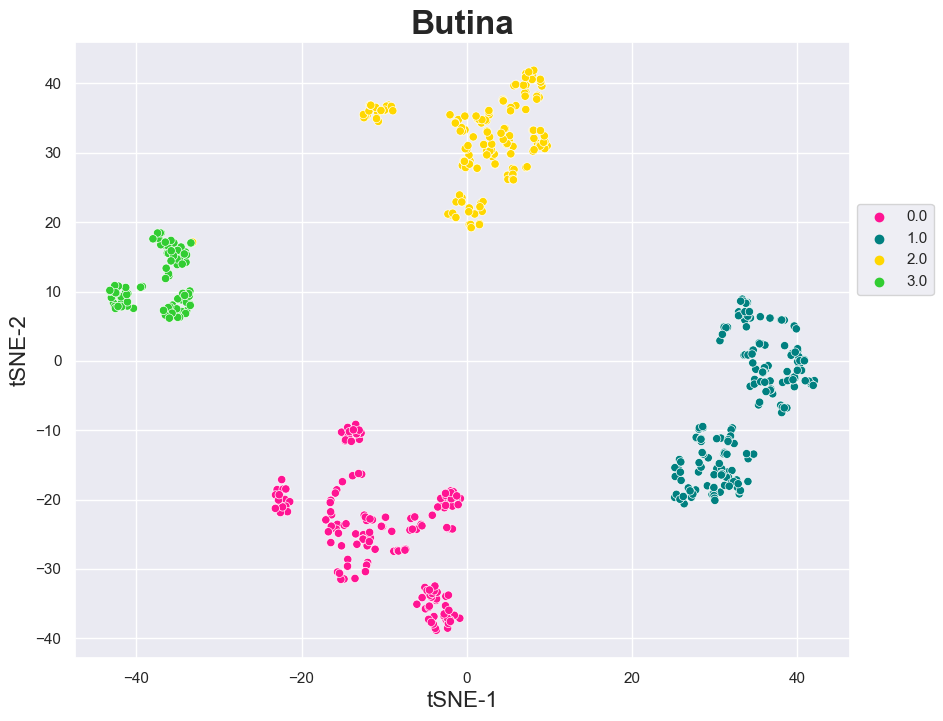

In [93]:
color4 = ['#ff1493','#008080','#ffd700','#32CD32']
plot4 = cluster_scatter_plot(data= df_active1, no_cls= 3, mol_col='Molecule', algo = 'Butina',cluster_col='Cluster',
                             palette=sns.color_palette(color4))
plot4.visualize()
#plt.savefig('./ScatterplotButina_cps=1.png', dpi = 300)